In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# find last date entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [15]:
#last date minus 365 gives last 12 months 
last_twelve = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_twelve)

2016-08-23


In [19]:
#pull the last year of precipitation data

precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year).\
    order_by(Measurement.date).all()

In [20]:
# make dataframe

precip_df = pd.DataFrame(precip)
precip_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


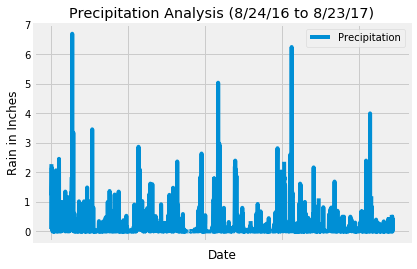

In [24]:
# plot the dataframe

precip_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.show()

In [25]:
# Use Pandas to print the summary statistics for the precipitation data.
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
#======================================
#Station Analysis

# Count the number of stations in the Measurement table
station_count = session.query(Measurement).group_by(Measurement.station).count()

print(station_count)

9
